In [3]:
import xarray as xr

f= 'wrfout_d02_2023-01-01_*' 
run_id              = 'tok_test_dom'
base_dir            = '/Users/doan/Google Drive/My Drive/share/2024/PGW_DS/'
run_dir             = base_dir + "/Run_WRF/"+run_id+'/'
dd = []
for d in ['control', 'PGW_DS']:
    ds = xr.open_mfdataset(run_dir+d+'/'+f, combine='nested', concat_dim='Time')
    dd.append(ds)

In [39]:
d1

<xarray.Dataset>
Dimensions:                (Time: 19, south_north: 50, west_east: 50,
                            bottom_top: 44, bottom_top_stag: 45,
                            soil_layers_stag: 4, west_east_stag: 51,
                            south_north_stag: 51, seed_dim_stag: 8)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    XLONG                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    XTIME                  (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 50, 51), meta=np.ndarray>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 50, 51), meta=np.ndarray>
    XLAT_V                 (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 51, 50), meta=np.ndarray>
    XLONG_V                (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 51, 50), meta=np.ndarray>
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/210)
    Times                  (Time) |S19 dask.array<chunksize=(1,), meta=np.ndarray>
    LU_INDEX               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ZNU                    (Time, bottom_top) float32 dask.array<chunksize=(1, 44), meta=np.ndarray>
    ZNW                    (Time, bottom_top_stag) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    ZS                     (Time, soil_layers_stag) float32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    DZS                    (Time, soil_layers_stag) float32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    PC                     (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    LANDMASK               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    LAKEMASK               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    SST                    (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    SST_INPUT              (Time, south_north, west_east) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
Attributes: (12/136)
    TITLE:                            OUTPUT FROM WRF V4.6.0 MODEL
    START_DATE:                      2023-01-01_00:00:00
    SIMULATION_START_DATE:           2023-01-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        51
    SOUTH-NORTH_GRID_DIMENSION:      51
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

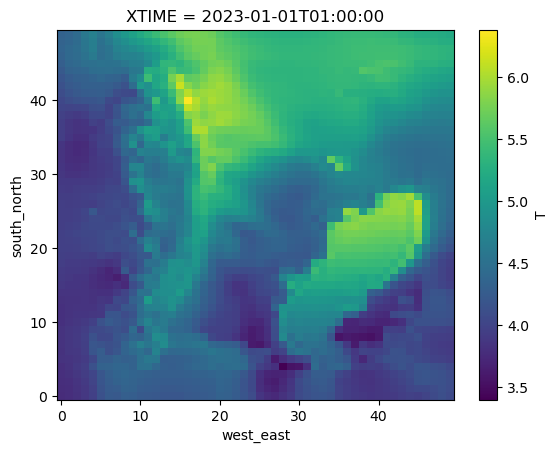

In [5]:
d1, d2 = dd
df = d2.T - d1.T
df[1,1].plot()

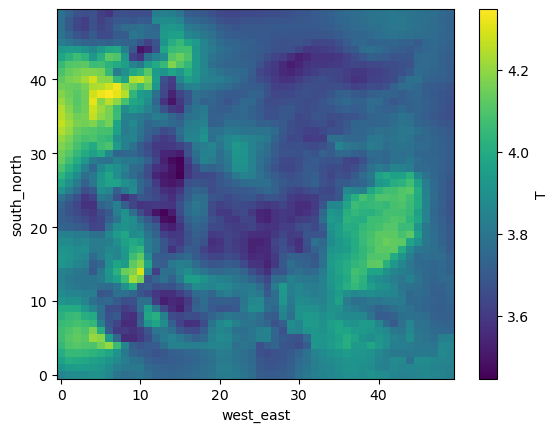

In [6]:
df.mean(dim='Time')[1].plot()

In [7]:
df2 = d2.T2 - d1.T2

In [53]:
df2.to_netcdf('warmingT2.nc')

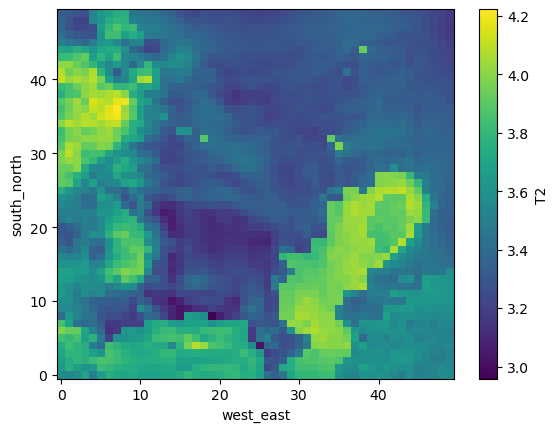

In [8]:
df2.mean('Time').plot()

In [25]:
f= 'wrfout_d02_2023-01-01_02:00:00' 

dd = []
for d in ['PGW_DS/wrfout/', 'PGW_DS']:
    ds = xr.open_dataset(d+'/'+f)
    dd.append(ds)